In [1]:
#import src.functions as func
from src.functions import load_data, baseline_model_fit_save, bootstrap_evaluate, compute_confidence_interval, plot_metrics_boxplot, elasticnet_feature_selection, hyperparameter_tuning_save
import numpy as np
import pandas as pd
from sklearn.linear_model import ElasticNet, BayesianRidge
from sklearn.svm import SVR

In [ ]:
dev_data_path = "data/assignment1_dev_set.csv"
val_data_path = "data/assignment1_val_set.csv"
# Load and split data
X_train, y_train = load_data(dev_data_path)
X_test, y_test = load_data(val_data_path)


Baseline model ElasticNet trained and saved.
Bootstrapping evaluation for ElasticNet on evaluation data...


c:\Users\izabe\uni\MLinCB\MLinCB-Assignment-1\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but ElasticNet was fitted without feature names
  warnings.warn(
c:\Users\izabe\uni\MLinCB\MLinCB-Assignment-1\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but ElasticNet was fitted without feature names
  warnings.warn(
c:\Users\izabe\uni\MLinCB\MLinCB-Assignment-1\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but ElasticNet was fitted without feature names
  warnings.warn(
c:\Users\izabe\uni\MLinCB\MLinCB-Assignment-1\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but ElasticNet was fitted without feature names
  warnings.warn(
c:\Users\izabe\uni\MLinCB\MLinCB-Assignment-1\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but ElasticNet was fitted without feature names
  

95% CI for RMSE: (np.float64(3.5737134360090925), np.float64(4.709459153404227))
95% CI for MAE: (np.float64(2.6064890256060758), np.float64(3.2927011769414154))
95% CI for R2: (np.float64(-0.22008140150587144), np.float64(0.020817476925285103))
Baseline model SVR trained and saved.
Bootstrapping evaluation for SVR on evaluation data...


c:\Users\izabe\uni\MLinCB\MLinCB-Assignment-1\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(
c:\Users\izabe\uni\MLinCB\MLinCB-Assignment-1\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(
c:\Users\izabe\uni\MLinCB\MLinCB-Assignment-1\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(
c:\Users\izabe\uni\MLinCB\MLinCB-Assignment-1\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(
c:\Users\izabe\uni\MLinCB\MLinCB-Assignment-1\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(
c:\Users\izabe\uni\M

95% CI for RMSE: (np.float64(3.3374133113792315), np.float64(4.574523900028227))
95% CI for MAE: (np.float64(2.391738467305707), np.float64(3.0853610048244278))
95% CI for R2: (np.float64(-0.06962358672852388), np.float64(0.07414172123092469))
Baseline model BayesianRidge trained and saved.
Bootstrapping evaluation for BayesianRidge on evaluation data...


c:\Users\izabe\uni\MLinCB\MLinCB-Assignment-1\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but BayesianRidge was fitted without feature names
  warnings.warn(
c:\Users\izabe\uni\MLinCB\MLinCB-Assignment-1\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but BayesianRidge was fitted without feature names
  warnings.warn(
c:\Users\izabe\uni\MLinCB\MLinCB-Assignment-1\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but BayesianRidge was fitted without feature names
  warnings.warn(
c:\Users\izabe\uni\MLinCB\MLinCB-Assignment-1\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but BayesianRidge was fitted without feature names
  warnings.warn(
c:\Users\izabe\uni\MLinCB\MLinCB-Assignment-1\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but BayesianRidge was fitted without f

95% CI for RMSE: (np.float64(3.329520388395785), np.float64(4.494324149123915))
95% CI for MAE: (np.float64(2.450919338409981), np.float64(3.0582174298798965))
95% CI for R2: (np.float64(-0.03895650464502292), np.float64(0.09047744105891174))


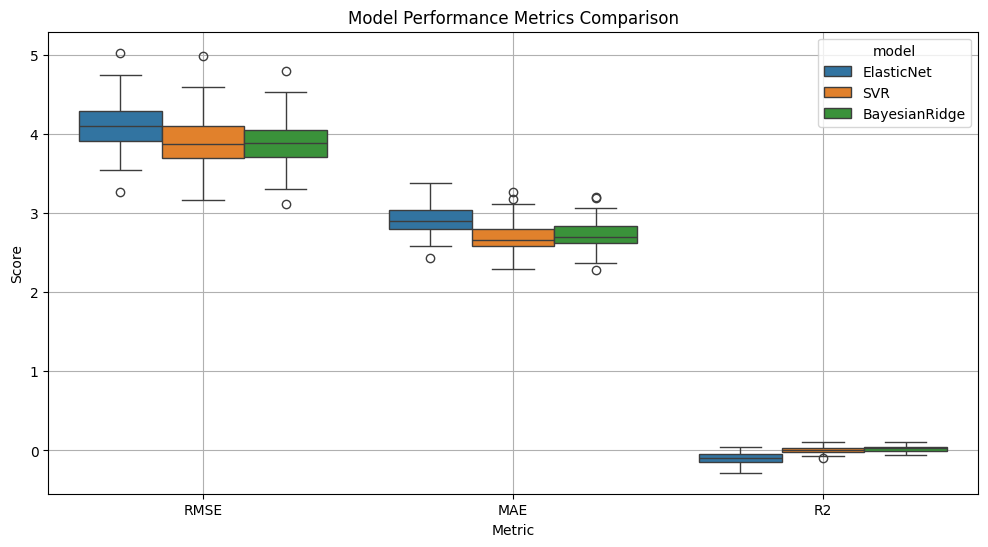

In [3]:
# Define models
models = {
    "ElasticNet": ElasticNet(alpha=0.1, l1_ratio=0.5),
    "SVR": SVR(C=1.0, epsilon=0.2),
    "BayesianRidge": BayesianRidge()
}

evaluation_results = []

# Evaluate each model on the development dataset and then on the evaluation dataset
for name, model in models.items():
    
    baseline = baseline_model_fit_save(model, name, X_train=X_train, y_train=y_train, prefix="baseline")
    print(f"Baseline model {name} trained and saved.")
    
    print(f"Bootstrapping evaluation for {name} on evaluation data...")
    eval_metrics = bootstrap_evaluate(model, X_test, y_test, n_bootstraps=100)
    rmse_ci = compute_confidence_interval(eval_metrics['RMSE'])
    mae_ci = compute_confidence_interval(eval_metrics['MAE'])
    r2_ci = compute_confidence_interval(eval_metrics['R2'])

    print("95% CI for RMSE:", rmse_ci)
    print("95% CI for MAE:", mae_ci)
    print("95% CI for R2:", r2_ci)
    eval_metrics['model'] = name
    evaluation_results.append(eval_metrics)

# Combine evaluation results for boxplot comparison
combined_eval_df_baseline = pd.concat(evaluation_results, ignore_index=True)


# Plot the evaluation metrics for all models
plot_metrics_boxplot(combined_eval_df_baseline, save_path="plots/baseline_evaluation_metrics_boxplot.png")

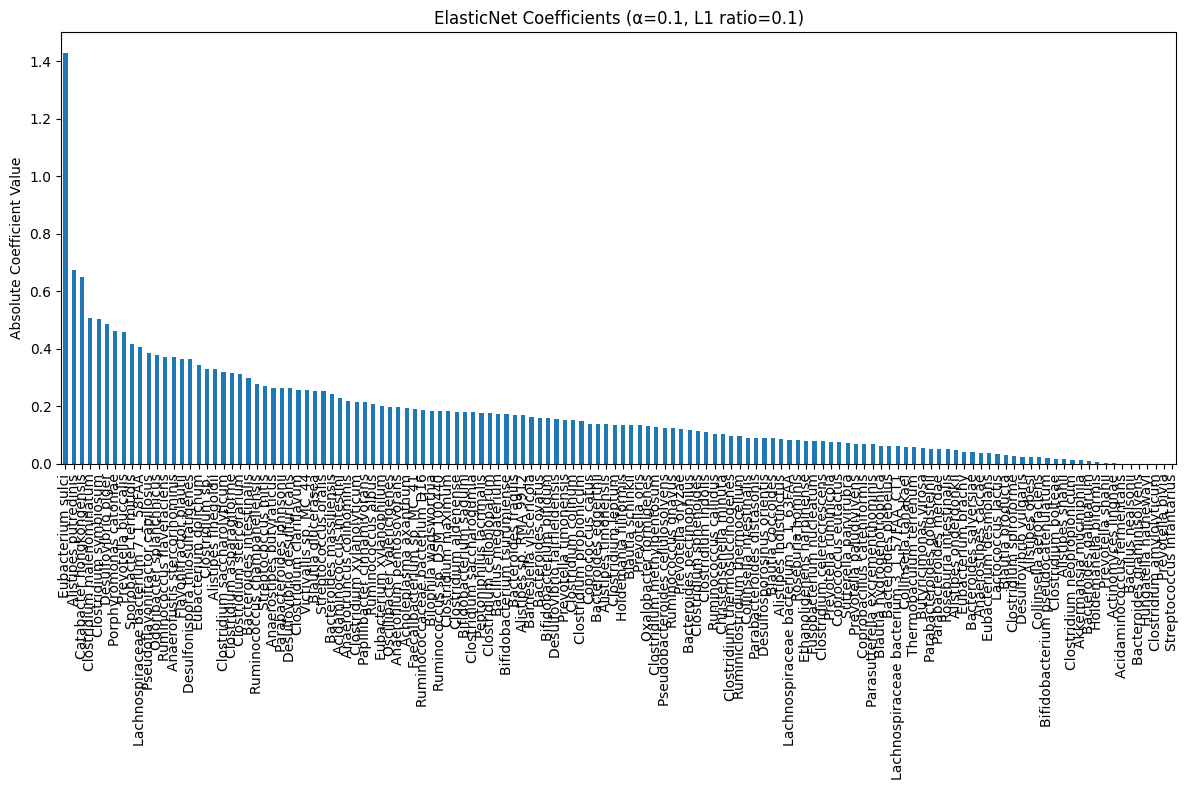

In [4]:
selected_features, coefs = elasticnet_feature_selection(X_train, y_train, 
                       alpha=0.1, l1_ratio=0.1)


Bootstrapping evaluation for ElasticNet on evaluation data after feature selection...


c:\Users\izabe\uni\MLinCB\MLinCB-Assignment-1\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but ElasticNet was fitted without feature names
  warnings.warn(
c:\Users\izabe\uni\MLinCB\MLinCB-Assignment-1\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but ElasticNet was fitted without feature names
  warnings.warn(
c:\Users\izabe\uni\MLinCB\MLinCB-Assignment-1\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but ElasticNet was fitted without feature names
  warnings.warn(
c:\Users\izabe\uni\MLinCB\MLinCB-Assignment-1\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but ElasticNet was fitted without feature names
  warnings.warn(
c:\Users\izabe\uni\MLinCB\MLinCB-Assignment-1\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but ElasticNet was fitted without feature names
  

95% CI for RMSE: (np.float64(3.6828742358991593), np.float64(4.637643822668097))
95% CI for MAE: (np.float64(2.5639361510151746), np.float64(3.230107464352356))
95% CI for R2: (np.float64(-0.3084300740886252), np.float64(0.06572976092532523))
Bootstrapping evaluation for SVR on evaluation data after feature selection...


c:\Users\izabe\uni\MLinCB\MLinCB-Assignment-1\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(
c:\Users\izabe\uni\MLinCB\MLinCB-Assignment-1\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(
c:\Users\izabe\uni\MLinCB\MLinCB-Assignment-1\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(
c:\Users\izabe\uni\MLinCB\MLinCB-Assignment-1\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(
c:\Users\izabe\uni\MLinCB\MLinCB-Assignment-1\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(
c:\Users\izabe\uni\M

95% CI for RMSE: (np.float64(3.3007969182140346), np.float64(4.555650119309954))
95% CI for MAE: (np.float64(2.3741867085498347), np.float64(3.0387360995999773))
95% CI for R2: (np.float64(-0.06632912053456995), np.float64(0.0886661227977562))
Bootstrapping evaluation for BayesianRidge on evaluation data after feature selection...


c:\Users\izabe\uni\MLinCB\MLinCB-Assignment-1\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but BayesianRidge was fitted without feature names
  warnings.warn(
c:\Users\izabe\uni\MLinCB\MLinCB-Assignment-1\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but BayesianRidge was fitted without feature names
  warnings.warn(
c:\Users\izabe\uni\MLinCB\MLinCB-Assignment-1\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but BayesianRidge was fitted without feature names
  warnings.warn(


95% CI for RMSE: (np.float64(3.7724846911695504), np.float64(4.765700234396623))
95% CI for MAE: (np.float64(2.6388564747942485), np.float64(3.313242789921046))
95% CI for R2: (np.float64(-0.4532653053360524), np.float64(0.03469649671846842))


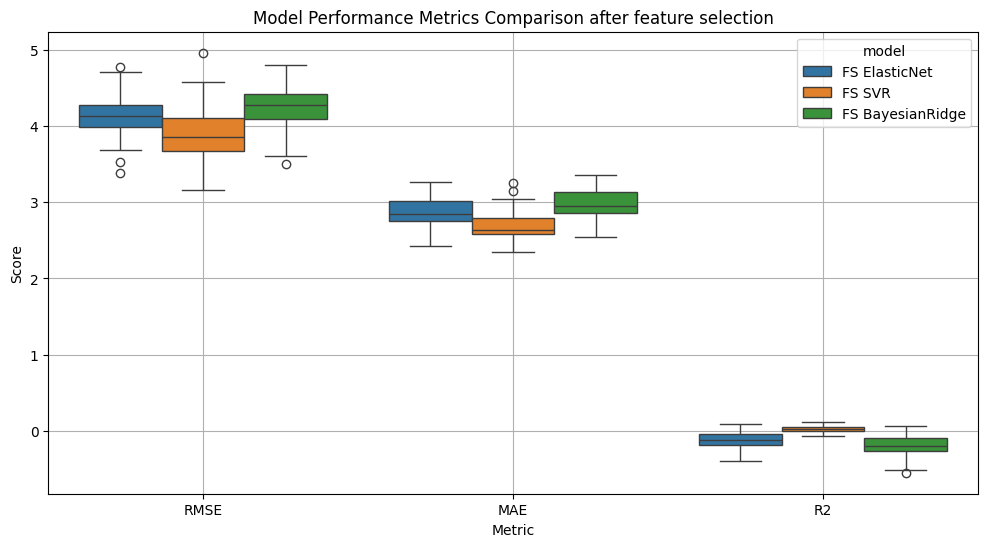

In [5]:
# Define models
models = {
    "ElasticNet": ElasticNet(alpha=0.1, l1_ratio=0.5),
    "SVR": SVR(C=1.0, epsilon=0.2),
    "BayesianRidge": BayesianRidge()
}

    
# Create DataFrame with selected features
X_train_selected = pd.DataFrame(X_train, columns=selected_features)
X_test_selected = pd.DataFrame(X_test, columns=selected_features)

evaluation_results = []

# Evaluate each model on the development dataset and then on the evaluation dataset
for name, model in models.items():
    
    baseline = baseline_model_fit_save(model, name, X_train=X_train_selected, y_train=y_train, prefix="FS_")
    
    print(f"Bootstrapping evaluation for {name} on evaluation data after feature selection...")
    eval_metrics = bootstrap_evaluate(model, X_test_selected, y_test, n_bootstraps=100)
    rmse_ci = compute_confidence_interval(eval_metrics['RMSE'])
    mae_ci = compute_confidence_interval(eval_metrics['MAE'])
    r2_ci = compute_confidence_interval(eval_metrics['R2'])

    print("95% CI for RMSE:", rmse_ci)
    print("95% CI for MAE:", mae_ci)
    print("95% CI for R2:", r2_ci)
    eval_metrics['model'] = f"FS {name}"
    evaluation_results.append(eval_metrics)

# Combine evaluation results for boxplot comparison
combined_eval_df = pd.concat(evaluation_results, ignore_index=True)


# Plot the evaluation metrics for all models
plot_metrics_boxplot(combined_eval_df, name = "Model Performance Metrics Comparison after feature selection", save_path="plots/FS_evaluation_metrics_boxplot.png")


=== Tuning ElasticNet ===
Best parameters: {'alpha': 1, 'copy_X': True, 'fit_intercept': True, 'l1_ratio': np.float64(0.1), 'max_iter': 1000, 'positive': False, 'precompute': False, 'random_state': None, 'selection': 'cyclic', 'tol': 0.0001, 'warm_start': False}

=== Tuning SVR ===
Best parameters: {'C': 1, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.01, 'gamma': 'scale', 'kernel': 'linear', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}

=== Tuning BayesianRidge ===
Best parameters: {'alpha_1': 1e-06, 'alpha_2': 1e-06, 'alpha_init': None, 'compute_score': False, 'copy_X': True, 'fit_intercept': True, 'lambda_1': 0.0001, 'lambda_2': 1e-06, 'lambda_init': None, 'max_iter': 300, 'tol': 0.001, 'verbose': False}

=== Evaluating tuned ElasticNet ===
95% CI for RMSE: (np.float64(3.3491087036356926), np.float64(4.3993231948478755))
95% CI for MAE: (np.float64(2.44492332062143), np.float64(3.0369969485475576))
95% CI for R2: (np.float64(-0.010538061900688709

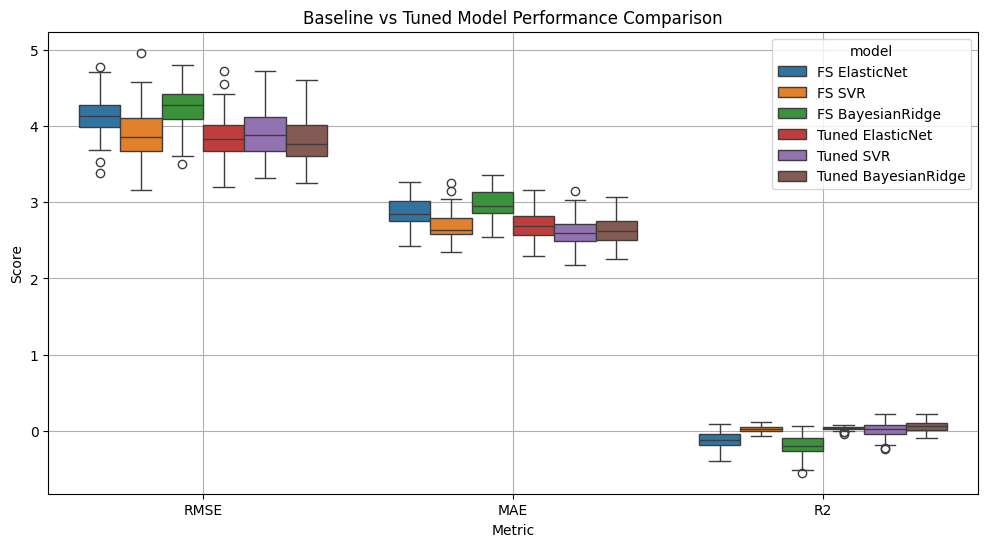

In [ ]:
# Define models with their parameter grids
tuning_config = {
    "ElasticNet": {
        "model": ElasticNet(),
        "params": {
            "alpha": [0.001, 0.01, 0.1, 1, 10],
            "l1_ratio": np.arange(0.1, 1.0, 0.1)
        }
    },
    "SVR": {
        "model": SVR(),
        "params": {
            "C": [0.1, 1, 10],
            "epsilon": [0.01, 0.1, 0.5],
            "kernel": ["linear", "rbf"]
        }
    },
    "BayesianRidge": {
        "model": BayesianRidge(),
        "params": {
            "alpha_1": [1e-6, 1e-5, 1e-4],
            "lambda_1": [1e-6, 1e-5, 1e-4]
        }
    }
}

# Perform hyperparameter tuning
tuned_models = {}
for name, config in tuning_config.items():
    print(f"\n=== Tuning {name} ===")
    best_model, cv_results = hyperparameter_tuning_save(
        config["model"], 
        name,
        config["params"],
        X_train_selected,
        y_train,
        cv=5
    )
    tuned_models[name] = best_model
    print(f"Best parameters: {best_model.get_params()}")

# Evaluate tuned models
tuned_evaluation_results = []
for name, model in tuned_models.items():
    print(f"\n=== Evaluating tuned {name} ===")
    eval_metrics = bootstrap_evaluate(model, X_test_selected, y_test)
    
    # Calculate confidence intervals
    rmse_ci = compute_confidence_interval(eval_metrics['RMSE'])
    mae_ci = compute_confidence_interval(eval_metrics['MAE'])
    r2_ci = compute_confidence_interval(eval_metrics['R2'])

    print(f"95% CI for RMSE: {rmse_ci}")
    print(f"95% CI for MAE: {mae_ci}")
    print(f"95% CI for R2: {r2_ci}")
    
    eval_metrics['model'] = f"Tuned {name}"
    tuned_evaluation_results.append(eval_metrics)


# Plot comparison
plot_metrics_boxplot(
    pd.concat(tuned_evaluation_results),
    name="Tuned Model Performance Metrics Comparison",
    save_path="plots/tuned_comparison_boxplot.png"
)

In [ ]:
# Combine baseline, tuned, and additional evaluation results
full_results = pd.concat(
    [combined_eval_df_baseline, combined_eval_df, pd.concat(tuned_evaluation_results)], 
    ignore_index=True
)

# Plot comparison
plot_metrics_boxplot(
    full_results,
    name="Tuned Model Performance Comparison",
    save_path="plots/tuned_comparison_boxplot.png"
)


In [ ]:
from tabulate import tabulate

# Calculate the mean for each model across the metrics
means_df = full_results.groupby('model')[['RMSE', 'MAE', 'R2']].mean().reset_index()

# Print the table in a beautiful format
table = tabulate(means_df, headers='keys', tablefmt='pipe', showindex=False)

# Print the table
print(table)


| model            |    RMSE |     MAE |         R2 |
|:-----------------|--------:|--------:|-----------:|
| FS BayesianRidge | 4.26559 | 2.97724 | -0.184742  |
| FS ElasticNet    | 4.14067 | 2.87818 | -0.114206  |
| FS SVR           | 3.89668 | 2.67954 |  0.0193458 |


In [ ]:
dev_data_path = "data/assignment1_dev_set.csv"
val_data_path = "data/assignment1_val_set.csv"
# Load and split data
X_train, y_train = load_data(dev_data_path)
X_test, y_test = load_data(val_data_path)

X_full = pd.concat([X_train, X_test], ignore_index=True)
y_full = pd.concat([y_train, y_test], ignore_index=True)

# Fit winner model on full data
best_model = tuned_models["ElasticNet"]
baseline_model_fit_save(
    best_model, 
    "Final_Model",
    X_train=X_full,
    y_train=y_full,
    path="/final_models",
    prefix="winner_",
)

SyntaxError: invalid syntax. Perhaps you forgot a comma? (2358926155.py, line 17)